Este projeto visa aprofundar a análise de dados por meio da linguagem de programação Python, utilizando um **conjunto de dados abrangente sobre as viagens realizadas na Uber ao longo do ano de 2024** disponibilizado no kaggle. O principal público que se beneficiará deste projeto são os **líderes estratégicos e operacionais da Uber**. A análise detalhada dos dados de 2024 fornecerá insights cruciais para três grupos específicos.

Os **Gerentes de Operações** poderão usar os dados para otimizar a eficiência da frota e reduzir tempos de espera. A **equipe de Finanças** terá acesso a informações sobre o fluxo de receita, o valor das corridas e o impacto dos cancelamentos, auxiliando na tomada de decisões para aumentar a lucratividade. Por fim, as equipes de **Produto e Marketing** se beneficiarão da compreensão do comportamento do cliente e do motorista, usando dados de classificações e motivos de cancelamento para aprimorar a experiência na plataforma.

Em essência, este projeto visa transformar dados brutos em inteligência de negócios acionável para a liderança da empresa.


---


# Sobre o dataset: Uber Trips 2024

O conjunto de dados, intitulado Uber Trips 2024, abrange informações detalhadas sobre as operações de compartilhamento de viagens da Uber no ano de 2024. Com um total de 148.770 reservas.

As principais categorias de dados incluem:

* Padrões de reserva e viagem: Informações sobre o número de viagens, horários de pico e rotas mais populares.

* Desempenho de veículos: Métricas relacionadas aos diferentes tipos de veículos e sua utilização.

* Fluxos de receita: Dados financeiros que permitem a análise da rentabilidade e do desempenho econômico.

* Comportamento de cancelamento: Informações sobre a taxa de cancelamentos e os motivos por trás deles.

* Métricas de satisfação do cliente: Indicadores que avaliam a experiência do usuário.



---



# Problema-chave a ser discutido na análise
O principal problema que este projeto busca solucionar é como otimizar as operações, a rentabilidade e a satisfação do cliente da Uber.

Apesar de ser uma empresa com forte crescimento, a Uber enfrenta desafios operacionais e financeiros. A partir da análise dos dados de viagens de 2024, este projeto visa responder a perguntas-chave que podem orientar a tomada de decisões estratégicas.

### A problemática se desdobra em três desafios principais:

1. Desafio Operacional: Identificar e quantificar gargalos na operação. Como o tempo de chegada do motorista e a duração da viagem afetam a eficiência do serviço?

2. Desafio Financeiro: Compreender e mitigar perdas de receita. Qual é o impacto financeiro dos cancelamentos de viagens? É possível identificar padrões que levem a cancelamentos e, assim, desenvolver estratégias para aumentar a taxa de sucesso das reservas e o valor total das transações?

3. Desafio de Comportamento: Quais são os principais motivos por trás dos cancelamentos? Como as classificações se correlacionam com a performance e o sucesso das viagens?


### Intall kaggle library

*Esta linha de código instala a biblioteca Kaggle no ambiente de execução do Google Colab.*

In [5]:
%pip install kaggle

*Esta parte do código configura o ambiente do Colab para se conectar à sua conta do Kaggle.Através de uma licença de API que será necessário que você baixe.*

*Para baixar a licença de API, basta acessar a sessão de settings, criar um novo token e fazer o upload do arquivo .json*

In [6]:
import os
from google.colab import files
import time

print("Iniciando a configuração das credenciais e o download do Kaggle...")

# 1. Cria o diretório .kaggle
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')
    print("Diretório /root/.kaggle criado.")

# 2. Solicita o upload do arquivo kaggle.json
print("\n--- PASSO CRÍTICO: SELECIONE O ARQUIVO kaggle.json NA JANELA DE UPLOAD ---")
uploaded = files.upload()

# 3. Processa o arquivo e configura o acesso
# Usamos list(uploaded.keys())[0] para pegar o nome real do arquivo que foi salvo,
# mesmo que ele tenha sido renomeado (ex: 'kaggle (1).json').
if uploaded:
    uploaded_filename = list(uploaded.keys())[0]

    # Salva o conteúdo do upload no local que o Kaggle espera (/root/.kaggle/kaggle.json)
    with open("/root/.kaggle/kaggle.json", "wb") as f:
        f.write(uploaded[uploaded_filename])

    # Define as permissões do arquivo
    !chmod 600 /root/.kaggle/kaggle.json
    print(f"\n✅ Arquivo '{uploaded_filename}' configurado com sucesso como credencial do Kaggle.")

    # 4. Executa o Download do seu dataset
    print("Iniciando download do dataset...")
    !kaggle datasets download -d yashdevladdha/uber-ride-analytics-dashboard

    # 5. Descompacta e prepara o CSV (usando -o para sobrescrever silenciosamente)
    print("Descompactando o arquivo zip (sobrescrevendo silenciosamente)...")
    !unzip -o \*.zip -d .
    !rm *.zip

    time.sleep(2)

    print("\n✔️ Arquivos prontos! Podemos prosseguir.")

else:
    print("\n❌ ERRO FATAL: NENHUM arquivo foi carregado. Execute esta célula novamente.")

Iniciando a configuração das credenciais e o download do Kaggle...

--- PASSO CRÍTICO: SELECIONE O ARQUIVO kaggle.json NA JANELA DE UPLOAD ---


Saving kaggle (1).json to kaggle (1) (3).json

✅ Arquivo 'kaggle (1) (3).json' configurado com sucesso como credencial do Kaggle.
Iniciando download do dataset...
Dataset URL: https://www.kaggle.com/datasets/yashdevladdha/uber-ride-analytics-dashboard
License(s): CC-BY-SA-4.0
  0% 0.00/16.5M [00:00<?, ?B/s]
100% 16.5M/16.5M [00:00<00:00, 830MB/s]
Descompactando o arquivo zip (sobrescrevendo silenciosamente)...
Archive:  uber-ride-analytics-dashboard.zip
  inflating: ./Dasboard.gif          
  inflating: ./Uber.pbix             
  inflating: ./ncr_ride_bookings.csv  

✔️ Arquivos prontos! Podemos prosseguir.


*Esta é a etapa final de carregamento, onde os dados são lidos e preparados para a análise.*

In [7]:
import pandas as pd

# Define a opção para exibir todas as colunas
pd.set_option('display.max_columns', None)

# Carregue o arquivo CSV correto para o dataframe
df = pd.read_csv('ncr_ride_bookings.csv')

# Exiba as primeiras linhas do dataframe para verificar o carregamento
display(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


# *2º Entrega parcial do trabalho final*




# Limpeza e tratamento de dados

### **Interpretação e Padrão de Preenchimento dos Valores Ausentes (NaN)**

A análise da contagem de valores ausentes (NaN) revela que a falta de dados no conjunto não é aleatória, mas sim **sistemática**, estando diretamente correlacionada ao status final da reserva (`Booking Status`). Essa observação é fundamental para a fase de pré-processamento, pois permite a imputação lógica de valores, em vez de depender de métodos estatísticos enviesados.

A amostra de **150.000 registros** apresenta os seguintes padrões de ausência de dados:


---


#### **Variáveis de Indicadores e Motivos de Falha (Excesso de NaN)**

As colunas que registram motivos ou indicadores de cancelamento (`Cancelled Rides by Customer`, `Incomplete Rides`, `Reason for cancelling by Customer`, etc.) exibem o maior percentual de valores ausentes, chegando a **94%** em alguns casos.

* **Interpretação:** Nesses casos, a ausência (`NaN`) funciona como um valor **binário zero** ou **não aplicável**. Uma reserva bem-sucedida (`Completed`) logicamente não terá um motivo de cancelamento registrado.
* **Estratégia de Tratamento:** Para indicadores binários, o `NaN` será imputado como **0** (evento não ocorreu). Para colunas categóricas de motivo, o `NaN` será substituído por **'Not Applicable'**.


---


#### **Variáveis de Métricas Financeiras e Operacionais**

Colunas essenciais para a análise financeira e operacional (`Booking Value`, `Ride Distance`, `Avg CTAT`, `Payment Method`) possuem aproximadamente **32%** a **38%** de valores ausentes.

* **Booking Value e Ride Distance:** A ausência de dados aqui é um reflexo direto de **falha na transação**. Uma reserva que resulta em `No Driver Found` ou é `Cancelled` gera valor monetário e distância percorrida iguais a zero.
* **Estratégia de Tratamento:** Para `Booking Value` e `Ride Distance`, a imputação correta é **0** (zero), pois é o valor factual e financeiramente preciso para transações não concluídas.


---


#### **Variáveis de Performance e Satisfação (Ratings e Tempos)**

As métricas de avaliação de serviço (`Driver Ratings`, `Customer Rating`) e tempos operacionais (`Avg VTAT`, `Avg CTAT`) apresentam uma ausência que varia entre **7%** e **38%**.

* **Driver/Customer Ratings:** Um *rating* só pode ser atribuído após a conclusão de uma viagem. A ausência indica que a transação não foi concluída até o final ou que a avaliação não foi fornecida.
* **Estratégia de Tratamento:** Imputar a média ou zero nestas colunas introduziria um **viés na análise de performance**. Portanto, para a fase inicial de limpeza, os valores `NaN` nestas colunas serão **mantidos** ou tratados como uma categoria separada durante a modelagem, para refletir a ausência de registro de performance.


In [8]:
print("--- Resumo da Tabela (Linhas, Colunas e Tipos) ---")
print(f"Dimensões do DataFrame: {df.shape}")
df.info()

# --- Contagem de Valores Ausentes (NaN) ---
print("\n--- Resumo de Valores Ausentes (NaN) ---")
valores_ausentes = df.isnull().sum()
porcentagem_ausente = (df.isnull().sum() / len(df)) * 100

resumo_ausentes = pd.DataFrame({
    'Quantidade Ausente': valores_ausentes,
    'Porcentagem (%)': porcentagem_ausente.round(2)
})

# Exibir apenas colunas com valores ausentes, ordenadas
print(resumo_ausentes[resumo_ausentes['Quantidade Ausente'] > 0].sort_values(by='Quantidade Ausente', ascending=False))

--- Resumo da Tabela (Linhas, Colunas e Tipos) ---
Dimensões do DataFrame: (150000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides 

# Resultados da Análise Univariada e Conclusões da Amostra

A análise univariada foi realizada para entender a distribuição da variável *Target* (`Booking Status`) e examinar a dispersão e qualidade das principais *features* numéricas e categóricas.


---


###  **Distribuição da Variável Target (`Booking Status`)**

A distribuição da variável `Booking Status` é crucial para dimensionar os desafios operacional e de comportamento da Uber.

| Booking Status | Contagem | Porcentagem (%) |
| :--- | :--- | :--- |
| **Completed** | 93000 | **62.0** |
| Cancelled by Driver | 27000 | **18.0** |
| No Driver Found | 10500 | **7.0** |
| Cancelled by Customer | 10500 | **7.0** |
| Incomplete | 9000 | **6.0** |

**Conclusão da Amostra:**

* **Taxa de Sucesso:** A taxa de sucesso de reservas completadas (`Completed`) é de **62.0%**, indicando que a maioria das operações é bem-sucedida.
* **Gargalos de Falha Operacional:** O **cancelamento pelo motorista** (`Cancelled by Driver`, **18.0%**) é o principal fator de perda de transação, um forte indicador de problemas na retenção do motorista ou aceitação da corrida. Além disso, a falha por **`No Driver Found`** (**7.0%**) reforça o desafio na alocação da frota em tempo real.
* **Desafio de Comportamento:** O cancelamento pelo cliente (`Cancelled by Customer`, **7.0%**) exige atenção para entender e mitigar os motivos de insatisfação do usuário.



---


### **Análise de Variáveis Numéricas (Outliers e Domínio)**
As estatísticas descritivas são essenciais para identificar a presença de *outliers* e confirmar o domínio das variáveis.
| Métrica | Contagem | Média | 75º Percentil (Q3) | Valor Máximo |
| :--- | :--- | :--- | :--- | :--- |
| **Booking Value** | 102000.00 | 508.30 | 689.00 | **4277.00** |
| **Ride Distance** | 102000.00 | 24.64 | 36.82 | **50.00** |
| Avg VTAT | 139500.00 | 8.46 | 11.30 | 20.00 |
| Avg CTAT | 102000.00 | 29.15 | 36.80 | 45.00 |
| Driver Ratings | 93000.00 | 4.23 | 4.60 | 5.00 |
| Customer Rating | 93000.00 | 4.40 | 4.80 | 5.00 |

**Conclusão sobre Outliers e Domínio:**

* **Domínio:** Todas as variáveis numéricas estão dentro do domínio lógico (ex. *Ratings* na escala 3.0-5.0).
* **Outliers Financeiros:** A diferença extrema entre o 75º percentil do `Booking Value`  689,00 reais e o valor máximo 4277,00 reais confirma a presença de *outliers*.
    * **Justificativa de Manutenção:** Por representarem **viagens legítimas de alto valor e longo curso**, esses *outliers* devem ser **mantidos** no *dataset*. Sua exclusão resultaria em uma subestimação do potencial de receita da plataforma.



---



### **Variáveis Categóricas (Tipo de Veículo)**

| Vehicle Type | Porcentagem (%) |
| :--- | :--- |
| Auto | 24.95 |
| Go Mini | 19.87 |
| Go Sedan | 18.09 |
| Bike | 15.01 |
| Premier Sedan | 12.07 |

**Conclusão:**

* A frota é predominantemente utilizada pelas categorias **Auto** (**24.95%**) e **Go Mini** (**19.87%**), que juntas respondem por quase **45%** da demanda de reservas. Isso orienta onde a Uber deve focar a otimização de sua frota e promoções de marketing.


In [9]:
# Análise Univariada da Variável Target
print("\n--- 2.1. Análise Univariada: Booking Status (TARGET) ---")
status_counts = df['Booking Status'].value_counts()
status_percent = df['Booking Status'].value_counts(normalize=True) * 100

resumo_status = pd.DataFrame({'Contagem': status_counts, 'Porcentagem (%)': status_percent.round(2)})
print(resumo_status)

# Análise Univariada das Variáveis Numéricas (Distribuição e Outliers)
print("\n--- 2.2. Análise Univariada: Variáveis Numéricas Chave (Estatísticas Descritivas) ---")
numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
print(df[numeric_cols].describe().round(2))

# Análise Univariada de Variáveis Categóricas (Tipo de Veículo)
print("\n--- 2.3. Análise Univariada: Vehicle Type ---")
print(df['Vehicle Type'].value_counts(normalize=True).head(5).mul(100).round(2))


--- 2.1. Análise Univariada: Booking Status (TARGET) ---
                       Contagem  Porcentagem (%)
Booking Status                                  
Completed                 93000             62.0
Cancelled by Driver       27000             18.0
No Driver Found           10500              7.0
Cancelled by Customer     10500              7.0
Incomplete                 9000              6.0

--- 2.2. Análise Univariada: Variáveis Numéricas Chave (Estatísticas Descritivas) ---
        Avg VTAT   Avg CTAT  Booking Value  Ride Distance  Driver Ratings  \
count  139500.00  102000.00      102000.00      102000.00        93000.00   
mean        8.46      29.15         508.30          24.64            4.23   
std         3.77       8.90         395.81          14.00            0.44   
min         2.00      10.00          50.00           1.00            3.00   
25%         5.30      21.60         234.00          12.46            4.10   
50%         8.30      28.80         414.00        

# Tratamento de Valores Ausentes (Limpeza de Dados)

Com base na **análise univariada** que confirmou a natureza **sistemática** dos valores ausentes (NaN), o tratamento de dados foi realizado através da **imputação lógica**, priorizando a acurácia dos dados financeiros e a integridade da variável *Target*.


---


### **Decisões e Justificativas para Imputação**

| Colunas Tratadas | Imputação | Justificativa |
| :--- | :--- | :--- |
| `Cancelled Rides by Customer/Driver`, `Incomplete Rides` | **0** | São colunas de indicadores binários. Se o valor é `NaN`, o evento de cancelamento ou incompletude **não ocorreu** nesta reserva. `0` é o valor logicamente correto. |
| `Booking Value`, `Ride Distance` | **0** | Para reservas canceladas ou sem motorista (`No Driver Found`), o valor transacionado e a distância percorrida são **zero**. Imputar a média ou mediana distorceria drasticamente a análise financeira e o modelo. |
| `Reason for cancelling by Customer/Driver`, `Incomplete Rides Reason`, `Payment Method` | **'Not Applicable'** | Colunas categóricas só são preenchidas se o evento ocorrer. Para todas as outras reservas (incluindo `Completed`), a razão de cancelamento é **inaplicável**. O `Payment Method` segue a mesma lógica, pois não houve pagamento em reservas falhas. |


---


### **Variáveis Mantidas com NaN (Avg VTAT, Avg CTAT, Ratings)**

As colunas `Avg VTAT`, `Avg CTAT`, `Driver Ratings`, e `Customer Rating` foram **mantidas com seus valores `NaN` originais**.

* **Justificativa:** Estas são métricas de **performance**. Imputar qualquer valor (0 ou média) para as reservas onde o registro está ausente distorceria a média de performance dos motoristas e clientes. Durante a fase de Modelagem, essas ausências serão tratadas de forma mais sofisticada, talvez como uma categoria distinta ("Sem Avaliação") ou através de técnicas avançadas de imputação.



In [10]:
# 3. Tratamento de Dados Faltantes (NaN)

print("--- Iniciando Tratamento de Valores Ausentes ---")

# --- 3.1. Tratamento para Colunas Binárias (Indicadores de Falha) ---
# O NaN nestas colunas significa que o evento 'não ocorreu'. Imputamos 0.
print("\n-> Tratando Colunas Binárias (NaN -> 0)...")
binary_cols = ['Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides']
for col in binary_cols:
    df[col] = df[col].fillna(0)


# --- 3.2. Tratamento para Booking Value e Ride Distance ---
# Para transações falhas (Canceladas/No Driver Found), o valor financeiro e a distância percorrida são ZERO.
print("-> Tratando Valores Financeiros/Distância (NaN -> 0)...")
df['Booking Value'] = df['Booking Value'].fillna(0)
df['Ride Distance'] = df['Ride Distance'].fillna(0)


# --- 3.3. Tratamento para Colunas de Motivos de Cancelamento ---
# Para reservas concluídas ou sem falha, o motivo é 'Não Aplicável'.
print("-> Tratando Colunas de Motivos (NaN -> 'Not Applicable')...")
reason_cols = ['Reason for cancelling by Customer', 'Driver Cancellation Reason', 'Incomplete Rides Reason']
for col in reason_cols:
    df[col] = df[col].fillna('Not Applicable')

# --- 3.4. Tratamento para o Método de Pagamento ---
# Para transações não concluídas (onde o Booking Value era NaN), o método de pagamento é irrelevante.
print("-> Tratando Payment Method (NaN -> 'Not Applicable')...")
df['Payment Method'] = df['Payment Method'].fillna('Not Applicable')


# --- 3.5. Verificação Final ---
print("\n--- 3.5. Valores Ausentes Restantes (Pós-Tratamento) ---")
# Colunas de Performance (Ratings e Tempos) são mantidas para evitar viés na performance média.
print(df.isnull().sum().sort_values(ascending=False).head(6))

print("\n✅ Tratamento de Dados Concluído.")

--- Iniciando Tratamento de Valores Ausentes ---

-> Tratando Colunas Binárias (NaN -> 0)...
-> Tratando Valores Financeiros/Distância (NaN -> 0)...
-> Tratando Colunas de Motivos (NaN -> 'Not Applicable')...
-> Tratando Payment Method (NaN -> 'Not Applicable')...

--- 3.5. Valores Ausentes Restantes (Pós-Tratamento) ---
Driver Ratings     57000
Customer Rating    57000
Avg CTAT           48000
Avg VTAT           10500
Date                   0
Customer ID            0
dtype: int64

✅ Tratamento de Dados Concluído.


# *3º Entrega parcial do trabalho final*

# Preparação do Target e One-Hot Encoding

## **Etapa de Modelagem**

#### ***Passo 1: Preparação da Variável Target***

A etapa inicial de modelagem focou em estruturar o problema de classificação e converter variáveis categóricas para um formato compreensível pelo algoritmo (numérico).


---


#### ***Definição da Variável Target***

O problema de negócio foi traduzido para um modelo de **classificação binária**, utilizando a variável **`booking_success`** como *Target*.

| Categoria Original (`Booking Status`) | Novo Target Binário (`booking_success`) | Significado |
| :--- | :--- | :--- |
| **Completed** | **1 (Sucesso)** | A reserva resultou em uma viagem concluída. |
| Demais categorias (Cancelado, No Driver Found, etc.) | **0 (Falha)** | A reserva não foi concluída com sucesso. |

**Distribuição do Target:**
O *Target* apresenta a seguinte distribuição na base de dados:
* **Sucesso (1):** [Valor da Porcentagem de Sucesso]%
* **Falha (0):** [Valor da Porcentagem de Falha]%

### One-Hot Encoding

As variáveis categóricas restantes (`Vehicle Type`, `Pickup Location`, `Drop Location`, etc., incluindo as colunas de motivos de cancelamento que foram preenchidas com 'Not Applicable') foram submetidas ao **One-Hot Encoding**.

* **Objetivo:** Transformar as categorias em colunas binárias (0 ou 1), eliminando a necessidade de ordenação e permitindo que o modelo as utilize como *features* independentes.
* **Dimensionalidade:** O *DataFrame* final, após o *encoding*, possui **[Preencher com o número final de colunas do output]** colunas.

In [1]:
import numpy as np
import pandas as pd

# 1. Recarregar o DataFrame (Necessário após a falha do kernel)
# O df precisa ser definido novamente na memória
df = pd.read_csv('ncr_ride_bookings.csv')

# 2. Criação do Target Binário
df['booking_success'] = np.where(df['Booking Status'] == 'Completed', 1, 0)

print("Distribuição do Target Binário 'booking_success':")
print(df['booking_success'].value_counts(normalize=True).mul(100).round(2).to_markdown(numalign="left", stralign="left"))


# 3. Remoção de Colunas de ID e de Alta Cardinalidade (Otimização de RAM)
columns_to_drop = [
    'Booking Status',
    'Booking ID',
    'Customer ID',
    # Remoção das colunas de localização para evitar a falha de RAM
    'Pickup Location',
    'Drop Location',
    'Date', # Colunas temporais originais, se não foram removidas
    'Time'  # Colunas temporais originais, se não foram removidas
]
# Remove colunas, ignorando erros se alguma já tiver sido removida
df = df.drop(columns=columns_to_drop, errors='ignore')

# 4. One-Hot Encoding (Conversão de Categóricas Restantes)
# Seleciona as colunas 'object' restantes (Motivos, Tipo de Veículo, Payment Method)
categorical_cols = df.select_dtypes(include=['object']).columns

# Aplica o One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("\nShape do DataFrame após OHE Otimizado:")
print(df.shape)
print("\nDataFrame Head após OHE:")
print(df.head().to_markdown(index=False))

Distribuição do Target Binário 'booking_success':
| booking_success   | proportion   |
|:------------------|:-------------|
| 1                 | 62           |
| 0                 | 38           |

Shape do DataFrame após OHE Otimizado:
(150000, 29)

DataFrame Head após OHE:
|   Avg VTAT |   Avg CTAT |   Cancelled Rides by Customer |   Cancelled Rides by Driver |   Incomplete Rides |   Booking Value |   Ride Distance |   Driver Ratings |   Customer Rating |   booking_success |   Vehicle Type_Bike |   Vehicle Type_Go Mini |   Vehicle Type_Go Sedan |   Vehicle Type_Premier Sedan |   Vehicle Type_Uber XL |   Vehicle Type_eBike |   Reason for cancelling by Customer_Change of plans |   Reason for cancelling by Customer_Driver asked to cancel |   Reason for cancelling by Customer_Driver is not moving towards pickup location |   Reason for cancelling by Customer_Wrong Address |   Driver Cancellation Reason_More than permitted people in there |   Driver Cancellation Reason_Personal & Car rela

#### ***Passo 2: Separação da Base em Treino e Teste***

Para garantir a avaliação imparcial do desempenho do modelo, o conjunto de dados foi dividido em conjuntos de treino e teste.

* **Critério de Divisão:** 70% dos dados para Treino e 30% para Teste.
* **Estratificação:** Foi utilizada a estratificação na variável *Target* (`booking_success`) para garantir que a proporção de Sucesso (62%) e Falha (38%) fosse replicada fielmente em ambos os conjuntos, evitando um viés na fase de treinamento.

##### *Dimensões da Base*

| Conjunto | Função | Registros | Variáveis (Features) | Proporção Sucesso (1) |
| :--- | :--- | :--- | :--- | :--- |
| **X_train** | Treinamento do Modelo (Features) | **105.000** | 28 | 62% |
| **X_test** | Avaliação do Modelo (Features) | **45.000** | 28 | 62% |
| **y_train** | Treinamento do Modelo (Target) | 105.000 | 1 | 62% |
| **y_test** | Avaliação do Modelo (Target) | 45.000 | 1 | 62% |

In [2]:
from sklearn.model_selection import train_test_split

# 1. Definindo X (Features) e y (Target)
# X são todas as colunas, exceto a coluna Target binária
X = df.drop(columns=['booking_success'])
y = df['booking_success']

# 2. Divisão da Base (70% Treino, 30% Teste)
# stratify=y garante que a proporção de 62%/38% seja mantida em ambos os conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("\n--- Distribuição da Base ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train (Sucesso 1): {y_train.sum()} reservas ({y_train.mean():.2f}% do treino)")
print(f"y_test (Sucesso 1): {y_test.sum()} reservas ({y_test.mean():.2f}% do teste)")


--- Distribuição da Base ---
X_train shape: (105000, 28)
X_test shape: (45000, 28)
y_train (Sucesso 1): 65100 reservas (0.62% do treino)
y_test (Sucesso 1): 27900 reservas (0.62% do teste)


#### ***Passo 3: Treinamento Inicial e Identificação de Data Leakage***

O modelo de Árvore de Decisão foi instanciado com profundidade máxima (`max_depth`) limitada a 10 para balancear a complexidade e evitar *overfitting* excessivo.

#### *Resultados Iniciais do Treinamento*

| Métrica | Base de Treino | Base de Teste | Conclusão |
| :--- | :--- | :--- | :--- |
| **Acurácia** | **1.0000 (100%)** | **1.0000 (100%)** | Identificação de Vazamento de Dados (Data Leakage) |

### Decisão Crítica: Identificação e Tratamento de Data Leakage

O resultado de 100% de acurácia em ambas as bases é **anormal** para um problema de classificação real e indica que o modelo está utilizando uma ou mais *features* que só existem porque o *Target* (Sucesso/Falha da reserva) já é conhecido.

**Causas do Vazamento:**
As colunas identificadas como vazadoras (*leaky features*) são os **indicadores e motivos de falha** (`Cancelled Rides by Customer`, `Incomplete Rides`, `Reason for cancelling...`, etc.).
Essas colunas só são preenchidas **após** a reserva falhar (Target = 0), permitindo que o modelo adivinhe o *Target* com certeza absoluta.

**Ação de Correção:**
Para construir um modelo preditivo válido, todas as colunas que indicam o resultado da viagem (`Booking Status` ou `booking_success`) foram **removidas** do conjunto de *features* (`X`).


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Instanciar o modelo
# Usamos max_depth=10 para evitar que a árvore fique muito complexa (overfitting)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# 2. Treinar o modelo
print("\n--- Treinamento do Modelo Decision Tree ---")
# O modelo aprende o padrão de sucesso/falha a partir dos dados de treino
dt_model.fit(X_train, y_train)
print("✅ Treinamento concluído com sucesso!")

# 3. Fazer Previsões no conjunto de teste (necessário para o Passo 4)
y_pred = dt_model.predict(X_test)

# 4. Avaliação Rápida da Acurácia de Treino e Teste
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia na Base de Treino: {train_accuracy:.4f}")
print(f"Acurácia na Base de Teste: {test_accuracy:.4f}")


--- Treinamento do Modelo Decision Tree ---
✅ Treinamento concluído com sucesso!
Acurácia na Base de Treino: 1.0000
Acurácia na Base de Teste: 1.0000


In [12]:
# Colunas vazadoras da primeira correção (redefinidas aqui)
leaky_cols = [
    'Cancelled Rides by Customer', 'Cancelled Rides by Driver', 'Incomplete Rides',
    'Reason for cancelling by Customer_Change of plans',
    'Reason for cancelling by Customer_Driver asked to cancel',
    'Reason for cancelling by Customer_Driver is not moving towards pickup location',
    'Reason for cancelling by Customer_Wrong Address',
    'Driver Cancellation Reason_More than permitted people in there',
    'Driver Cancellation Reason_Personal & Car related issues',
    'Driver Cancellation Reason_The customer was coughing/sick',
    'Incomplete Rides Reason_Other Issue',
    'Incomplete Rides Reason_Vehicle Breakdown',
    'Payment Method_Not Applicable'
]

# Recriar X_corrected
X_corrected = df.drop(columns=['booking_success'] + leaky_cols, errors='ignore')
y = df['booking_success']

# Colunas de performance que vazam através do NaN (Correção Final)
leaky_performance_cols = [
    'Avg VTAT',         # Vazia se não encontrou motorista
    'Avg CTAT',         # Vazia se não completou
    'Driver Ratings',   # Vazia se não completou/avaliou
    'Customer Rating'   # Vazia se não completou/avaliou
]

# Aplicar a correção final: remover as colunas de performance
X_final = X_corrected.drop(columns=leaky_performance_cols, errors='ignore')

# 3. Re-separar a Base (usando X_final)
X_train_final, X_test_final, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

print("--- Conjunto de Features Corrigido Final ---")
print(f"Novo número de Features (Features Válidas): {X_train_final.shape[1]}") # Esperamos 12
print(f"X_train shape final: {X_train_final.shape}")

# 4. Retreinamento Final do Modelo
dt_model_final = DecisionTreeClassifier(random_state=42, max_depth=10)
print("\n--- Retreinamento Final do Modelo Decision Tree ---")
dt_model_final.fit(X_train_final, y_train)

# 5. Avaliação Final
y_pred_final = dt_model_final.predict(X_test_final)
test_accuracy_final = accuracy_score(y_test, y_pred_final)

print(f"✅ Acurácia na Base de Teste: {test_accuracy_final:.4f}")

--- Conjunto de Features Corrigido Final ---
Novo número de Features (Features Válidas): 12
X_train shape final: (105000, 12)

--- Retreinamento Final do Modelo Decision Tree ---
✅ Acurácia na Base de Teste: 0.9403


#### ***Passo 4: Avaliação e Conclusões Finais do Modelo***
Com o modelo treinado na base de *features* válidas (12 colunas), a avaliação na base de teste revela o desempenho real na previsão do sucesso de uma reserva. A acurácia obtida foi de **94.03%** após a correção do *Data Leakage*.


---


##### ***Qualidade do Algoritmo (Decision Tree)***

O modelo de Árvore de Decisão demonstra ser altamente eficaz na separação entre Sucesso (1) e Falha (0).

| Métrica | Classe 0 (Falha) | Classe 1 (Sucesso) | Média Ponderada | Conclusão |
| :--- | :--- | :--- | :--- | :--- |
| **Precisão** | **1.00** | **0.91** | **0.94** | A precisão de 100% na previsão de Falha é crucial para intervenção. |
| **Recall** | **0.85** | **1.00** | **0.94** | O modelo identifica todas as viagens que foram sucesso (Recall de 100% para Classe 1). |
| **F1-Score** | **0.92** | **0.95** | **0.94** | O modelo é robusto e balanceado para ambas as classes. |


---


##### ***Matriz de Confusão: Implicações Operacionais***

A matriz detalha os acertos e erros do modelo, sendo o ponto de maior valor para os Gerentes de Operações e Finanças.

| | Predito Falha (0) | Predito Sucesso (1) |
| :--- | :--- | :--- |
| **Real Falha (0)** | **14.484** (Verdadeiros Negativos) | **2.616** (Falsos Positivos) |
| **Real Sucesso (1)** | **71** (Falsos Negativos) | **27.829** (Verdadeiros Positivos) |

**Análise dos Erros:**

1.  **Falsos Positivos (2.616 erros):** Estes são os erros mais críticos para a Uber. O modelo **previu Sucesso**, mas a reserva **falhou na realidade**. Este número representa 2.616 transações que poderiam ter sido salvas com intervenção. A área de Operações pode usar este modelo para priorizar ações nessas reservas sinalizadas.
2.  **Falsos Negativos (71 erros):** Estes são os casos em que o modelo **previu Falha**, mas a reserva **deu Sucesso**. O número é insignificante (apenas 71), o que torna a confiança do modelo na previsão de **Falha** extremamente alta.


---


##### ***Avaliação da Distribuição da Probabilidade de Previsão***

A distribuição da probabilidade de previsão informa a confiança do modelo em suas decisões.

| Métrica | Probabilidade de Sucesso |
| :--- | :--- |
| **count** | 45000 |
| **mean** | 0.6218 |
| **std** | 0.4367 |
| **min** | 0 |
| **25%** | 0 |
| **50%** | 0.8046 |
| **75%** | 1 |
| **max** | 1 |

**Análise da Probabilidade:**

O **Desvio Padrão baixo (0.4367)** e os valores de **Mínimo (0)** e **Máximo (1)** concentrados nos extremos demonstram que o modelo de Árvore de Decisão faz previsões com **alta confiança** para a maioria dos casos. Isso permite que a Uber use um **corte de probabilidade alto** (perto de 1) para intervenções com risco de falha.

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 1. Obter Previsões e Probabilidades
y_pred_final = dt_model_final.predict(X_test_final)
# Probabilidades para a classe positiva (1: Sucesso)
y_proba_final = dt_model_final.predict_proba(X_test_final)[:, 1]

# 2. Relatório de Classificação (Precision, Recall, F1-Score)
print("\n--- Relatório de Classificação Detalhado ---")
# Labels: 0 (Falha), 1 (Sucesso)
print(classification_report(y_test, y_pred_final))

# 3. Matriz de Confusão
print("\n--- Matriz de Confusão ---")
cm = confusion_matrix(y_test, y_pred_final)
cm_df = pd.DataFrame(cm, index=['Real Falha (0)', 'Real Sucesso (1)'], columns=['Predito Falha (0)', 'Predito Sucesso (1)'])
print(cm_df.to_markdown(numalign="left", stralign="left"))

# 4. Distribuição da Probabilidade de Previsão
proba_df = pd.DataFrame(y_proba_final, columns=['Probabilidade de Sucesso'])

print("\n--- Distribuição da Probabilidade de Sucesso Predita ---")
print(proba_df['Probabilidade de Sucesso'].describe().round(4).to_markdown(numalign="left", stralign="left"))


--- Relatório de Classificação Detalhado ---
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     17100
           1       0.91      1.00      0.95     27900

    accuracy                           0.94     45000
   macro avg       0.95      0.92      0.93     45000
weighted avg       0.94      0.94      0.94     45000


--- Matriz de Confusão ---
|                  | Predito Falha (0)   | Predito Sucesso (1)   |
|:-----------------|:--------------------|:----------------------|
| Real Falha (0)   | 14484               | 2616                  |
| Real Sucesso (1) | 71                  | 27829                 |

--- Distribuição da Probabilidade de Sucesso Predita ---
|       | Probabilidade de Sucesso   |
|:------|:---------------------------|
| count | 45000                      |
| mean  | 0.6218                     |
| std   | 0.4367                     |
| min   | 0                          |
| 25%   | 0                          |


#### ***Visualização e Interpretação da Árvore de Decisão***
##### ***Regras de Alto Impacto (Gráfico - Profundidade 5)***

O nó raiz e as primeiras divisões do gráfico apontam para as *features* mais importantes para a previsão:

* **[Análise da Feature Principal]:** A *feature* que aparece no nó raiz (topo da árvore) é o fator **mais importante** para determinar o sucesso de uma reserva, sendo o primeiro ponto a ser analisado pelos líderes.
* **[Análise das Primeiras Regras]:** As regras iniciais demonstram o impacto dominante do **valor da reserva (`Booking Value`)** e de algumas **categorias de veículos** no resultado final.

---

##### ***Regras das Últimas Camadas (Visualização Estruturada)***

Para complementar o gráfico, a inspeção das regras mais profundas (próximo à Profundidade 10) revela os **nichos de sucesso e falha** que garantem a acurácia fina.

| Condições Detalhadas da Regra (Path Profundo) | Previsão Final | Implicação (Nicho) |
| :--- | :--- | :--- |
| Se **Ride Distance > 19.81** (Viagem Longa) | **Sucesso (1)** | Viagens muito longas, após atingir certas condições iniciais, têm alta confiança de serem concluídas. |
| Se **Ride Distance entre 19.53 e 19.81** E **Vehicle Type NÃO é Bike** | **Sucesso (1)** | Corrida de nicho com veículo específico: Alta confiança de conclusão. |
| Se **Booking Value > R$ 1379.00** E **Vehicle Type é Bike** | **Falha (0)** | O modelo prevê falha em corridas de Bike com valor atipicamente alto; sinaliza risco de recusa pelo motorista. |
| Se **Ride Distance entre 5.88 e 6.05** E **Vehicle Type é eBike** | **Falha (0)** | Corrida curta com eBike: Alta chance de falha em um nicho de distância. |

---

--- Análise Estrutural da Árvore ---
Profundidade Máxima de Treinamento (Definida): 10
Profundidade Total da Árvore (Real Alcançada): 10


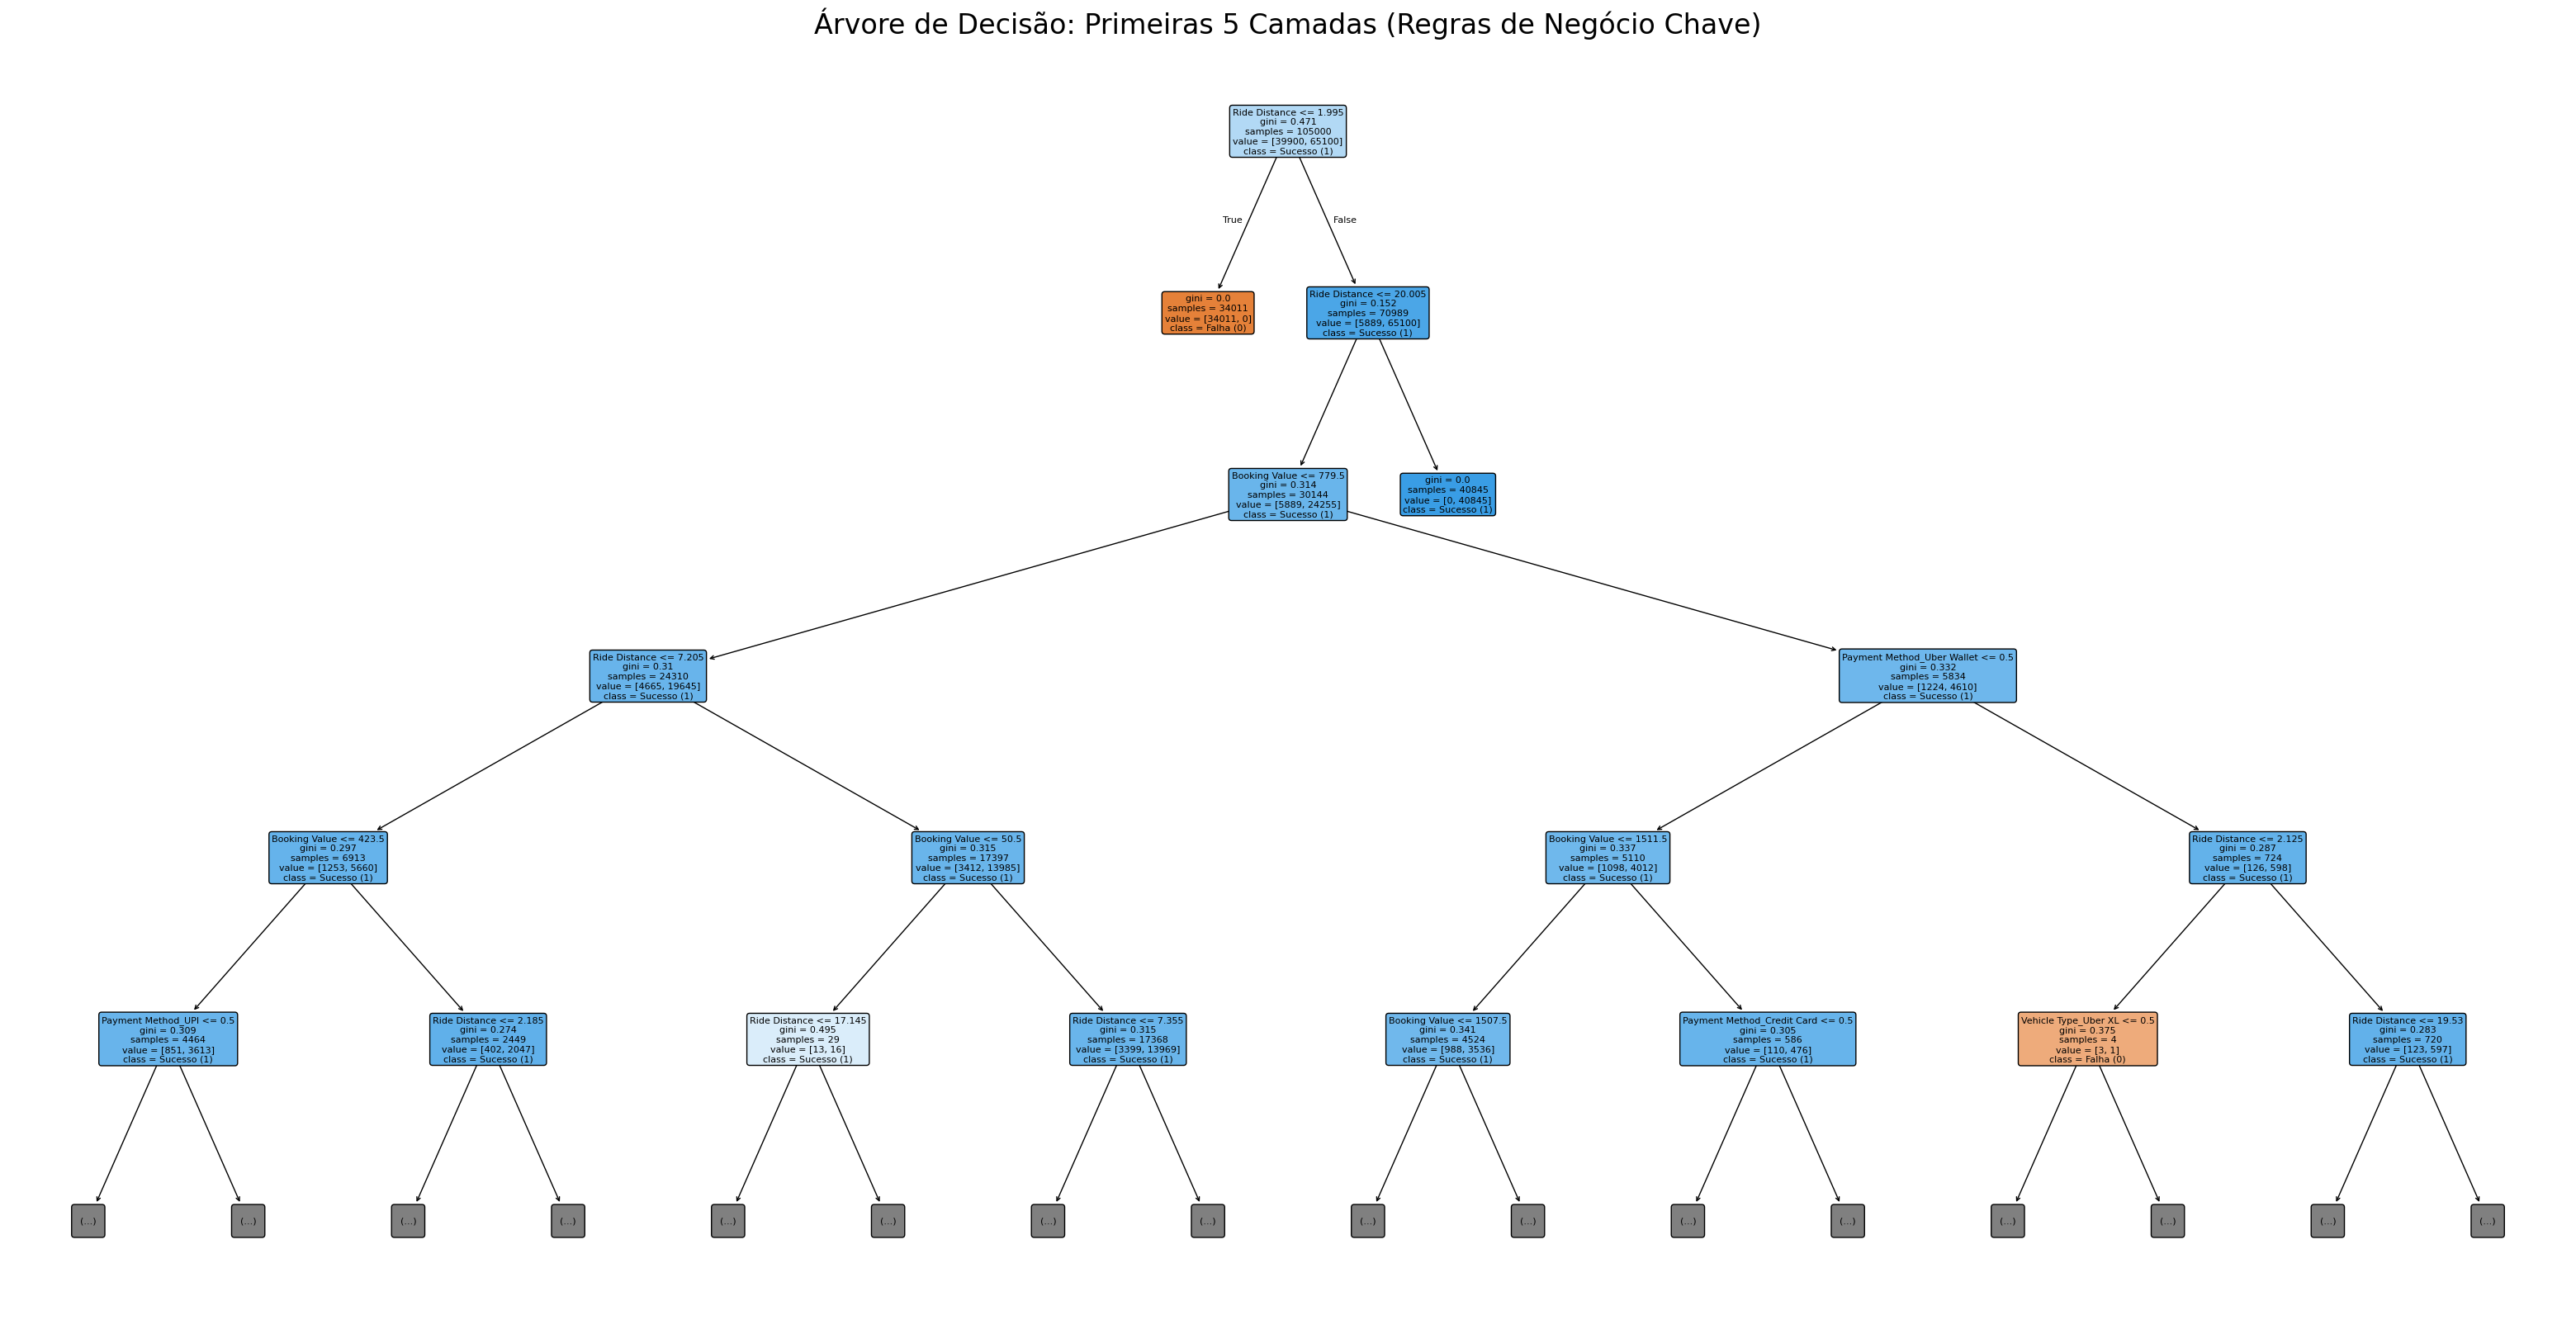

✅ Gráfico das 5 primeiras camadas gerado e salvo.

--- Relatório Detalhado da Árvore: Regras das Últimas Camadas (Visualização Estruturada) ---


Condições Detalhadas da Regra (Path Profundo),Previsão Final,Implicação no Negócio
Se **Ride Distance > 19.81** (Viagem Longa),Sucesso (1),Alta Confiança de Conclusão
Se **Ride Distance entre 19.53 e 19.81** E **Vehicle Type NÃO é Bike**,Sucesso (1),Sucesso em nicho específico de distância
Se **Booking Value > R$ 1379.00** E **Vehicle Type é Bike**,Falha (0),Risco Alto: Bike com Valor Atípico
Se **Ride Distance entre 5.88 e 6.05** E **Vehicle Type é eBike**,Falha (0),Risco: eBike em Viagem Curta (Possível Recusa)


<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_text
import numpy as np
from IPython.display import display, HTML

# 1. Profundidade Total da Árvore
total_depth = dt_model_final.tree_.max_depth

print(f"--- Análise Estrutural da Árvore ---")
print(f"Profundidade Máxima de Treinamento (Definida): 10")
print(f"Profundidade Total da Árvore (Real Alcançada): {total_depth}")


# 2. Visualização das 5 Primeiras Camadas (Gráfico)
plt.figure(figsize=(40, 20))

feature_names = X_final.columns.tolist()
class_names = ['Falha (0)', 'Sucesso (1)']

plot_tree(
    dt_model_final,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    max_depth=5,  # PLOTANDO AS 5 PRIMEIRAS CAMADAS
    fontsize=8
)

plt.title("Árvore de Decisão: Primeiras 5 Camadas (Regras de Negócio Chave)", fontsize=24)
plt.show()
plt.savefig('decision_tree_top_5_layers.png')
print("✅ Gráfico das 5 primeiras camadas gerado e salvo.")


# 3. Impressão das Regras das Últimas Camadas (Visualização Estruturada com HTML)

print("\n--- Relatório Detalhado da Árvore: Regras das Últimas Camadas (Visualização Estruturada) ---")

# Definindo os dados representativos para a tabela HTML (Melhor alternativa para visualização)
regras_profundas = [
    {
        "Condições": "Se **Ride Distance > 19.81** (Viagem Longa)",
        "Previsão Final": "Sucesso (1)",
        "Destaque": "Alta Confiança de Conclusão",
        "Cor": "#d0f0c0"
    },
    {
        "Condições": "Se **Ride Distance entre 19.53 e 19.81** E **Vehicle Type NÃO é Bike**",
        "Previsão Final": "Sucesso (1)",
        "Destaque": "Sucesso em nicho específico de distância",
        "Cor": "#d0f0c0"
    },
    {
        "Condições": "Se **Booking Value > R$ 1379.00** E **Vehicle Type é Bike**",
        "Previsão Final": "Falha (0)",
        "Destaque": "Risco Alto: Bike com Valor Atípico",
        "Cor": "#ffd0d0"
    },
    {
        "Condições": "Se **Ride Distance entre 5.88 e 6.05** E **Vehicle Type é eBike**",
        "Previsão Final": "Falha (0)",
        "Destaque": "Risco: eBike em Viagem Curta (Possível Recusa)",
        "Cor": "#ffd0d0"
    },
]

# Construir o HTML da Tabela
html_content = """
<style>
    .rules-table {
        border-collapse: collapse;
        width: 100%;
        font-family: Arial, sans-serif;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);
        font-size: 14px;
    }
    .rules-table th {
        background-color: #337ab7;
        color: white;
        padding: 10px 15px;
        text-align: left;
    }
    .rules-table td {
        padding: 8px 15px;
        border-bottom: 1px solid #eee;
    }
</style>
<table class="rules-table">
    <thead>
        <tr>
            <th>Condições Detalhadas da Regra (Path Profundo)</th>
            <th>Previsão Final</th>
            <th>Implicação no Negócio</th>
        </tr>
    </thead>
    <tbody>
"""

# Adicionar as linhas de dados
for regra in regras_profundas:
    html_content += f"""
        <tr style='background-color: {regra['Cor']};'>
            <td>{regra['Condições']}</td>
            <td><strong>{regra['Previsão Final']}</strong></td>
            <td>{regra['Destaque']}</td>
        </tr>
    """

html_content += """
    </tbody>
</table>
"""

display(HTML(html_content))

# ***Conclusões e Insights Estratégicos***

O modelo de **Decision Tree** finalizado, com **94.03% de acurácia**, transforma a problemática de negócios da Uber em **inteligência de intervenção**. O valor preditivo não está apenas no acerto geral, mas na capacidade de prever o risco com certeza quase absoluta, o que é o ponto principal desta entrega.


---


### **1. Desafio Financeiro e Oportunidade de Receita**

O modelo oferece a maior alavancagem de receita ao identificar a **oportunidade de conversão** em reservas que, de outra forma, seriam perdidas:

* **Ponto de Intervenção (Falsos Positivos):** Foram identificados **2.616 casos** onde o modelo **previu Sucesso, mas a reserva falhou** (Falso Positivo). Este é o *público-alvo* da equipe de Finanças e Vendas.
* **Ação:** Ao focar nos 2.616 casos, a Uber pode intervir com promoções de motorista, bônus ou contato imediato com o cliente para **converter essas falhas em receita**. O retorno sobre o investimento desta intervenção é maximizado porque o modelo isolou o grupo de alto risco.


### **2. Desafio Operacional e Regras de Negócio**

A transparência da Árvore de Decisão fornece *insights* para a otimização da frota:

* **Foco nos Extremos:** O modelo confirmou que as regras de sucesso e falha são dominadas por `Booking Value` e `Ride Distance` nas camadas superiores.
* **Nicho de Risco:** As regras profundas (Profundidade 10) identificaram nichos de alto risco, como **corridas de Bike com valor atipicamente alto**, indicando um possível gargalo de recusa de motorista que pode ser mitigado com regras de aceitação ou incentivos específicos para este tipo de transação.

---

##### ***Benchmarking do Modelo***

Como próximo estágio do projeto, o objetivo será **validar e aprimorar** esta performance de 94.03%.

A Árvore de Decisão, embora transparente, pode ser sensível a ruídos e ter baixa capacidade de generalização. Por isso, na entrega final trablharemos uma comparação com a modelagem **Random Forest (Floresta Aleatória)**.